In [1]:
#importing necessary libraries
import pandas as pd
import glob
import os
import warnings
import time
import sys
import matplotlib.pyplot as plt
import seaborn as sns
# importing custom scripts for different functions
sys.path.append('scripts')  # add scripts to path




# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
# Setting the directory containing our CSV files
csv_directory = "../data/Products"

# Use glob to match all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_directory, '*.csv'))

# Initialize an empty list to hold DataFrames
data_frames = []

# Iterate over the list of CSV files
for file in csv_files:
    # Read each CSV file into a DataFrame
    df = pd.read_csv(file)
    # Append the DataFrame to the list
    data_frames.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# printing part of the combined dataframe
combined_df

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date
0,Dry Onions,-,-,-,Ngurubani Market,65.00/Kg,80.00/Kg,6500.0,Kirinyaga,2026-02-11
1,Dry Onions,-,-,-,Kakamega Town,80.00/Kg,120.00/Kg,8000.0,Kakamega,2026-02-11
2,Dry Onions,-,-,-,Makutano Kirinyaga,60.00/Kg,80.00/Kg,2100.0,Kirinyaga,2026-02-11
3,Dry Onions,-,-,-,Mulot,65.00/Kg,80.00/Kg,900.0,Bomet,2026-02-11
4,Dry Onions,-,-,-,Kitale Municipality Market,60.00/Kg,70.00/Kg,3000.0,Trans-Nzoia,2026-02-11
...,...,...,...,...,...,...,...,...,...,...
57005,Banana (Ripening),-,-,-,Chuka,50.00/Kg,50.00/Kg,200.0,Tharaka-Nithi,2023-07-21
57006,Banana (Ripening),-,-,-,Kasikeu,40.00/Kg,50.00/Kg,NaN,Makueni,2023-07-21
57007,Banana (Ripening),-,-,-,Molo,-,80.00/Kg,4500.0,Nakuru,2023-07-20
57008,Banana (Ripening),-,-,-,Kerugoya,30.00/Kg,40.00/Kg,300.0,Kirinyaga,2023-07-20


In [3]:
# Displaying information about the combined DataFrame
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57010 entries, 0 to 57009
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Commodity       57010 non-null  object 
 1   Classification  57010 non-null  object 
 2   Grade           57010 non-null  object 
 3   Sex             57010 non-null  object 
 4   Market          57010 non-null  object 
 5   Wholesale       57010 non-null  object 
 6   Retail          57010 non-null  object 
 7   Supply Volume   39235 non-null  float64
 8   County          56991 non-null  object 
 9   Date            57010 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.3+ MB


In [4]:
# Saving the combined DataFrame to a new CSV file
combined_df.to_csv("combined.csv", index=False)


In [5]:
# Checking for missing values in the combined DataFrame
combined_df.isna().sum()


Commodity             0
Classification        0
Grade                 0
Sex                   0
Market                0
Wholesale             0
Retail                0
Supply Volume     17775
County               19
Date                  0
dtype: int64

In [6]:
combined_df['Commodity'].value_counts()


Cowpeas                        6000
Red Irish potato               3000
Wheat                          3000
Spinach                        3000
Omena                          3000
Finger Millet                  3000
Rice                           3000
Dry Maize                      3000
Dry Onions                     3000
Beans Red Haricot (Wairimu)    3000
Cowpea leaves (Kunde)          3000
Cabbages                       3000
Maize Flour                    3000
Kales/Sukuma Wiki              3000
Beans (Yellow-Green)           3000
Banana (Cooking)               3000
Banana (Ripening)              3000
Meat Beef                      3000
Red Sorghum                      10
Name: Commodity, dtype: int64

In [7]:
# Dropping the 'Supply Volume' column from the combined DataFrame
combined_df.drop(columns=['Supply Volume'], axis=1, inplace=True)

In [8]:
# Converting the 'Date' column to datetime format
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df.head()

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,County,Date
0,Dry Onions,-,-,-,Ngurubani Market,65.00/Kg,80.00/Kg,Kirinyaga,2026-02-11
1,Dry Onions,-,-,-,Kakamega Town,80.00/Kg,120.00/Kg,Kakamega,2026-02-11
2,Dry Onions,-,-,-,Makutano Kirinyaga,60.00/Kg,80.00/Kg,Kirinyaga,2026-02-11
3,Dry Onions,-,-,-,Mulot,65.00/Kg,80.00/Kg,Bomet,2026-02-11
4,Dry Onions,-,-,-,Kitale Municipality Market,60.00/Kg,70.00/Kg,Trans-Nzoia,2026-02-11


In [9]:
# Creating a new DataFrame by dropping specific columns from the combined DataFrame
data=combined_df.drop(columns=['Classification', 'Grade', 'Sex', 'Market'], axis=1)

In [10]:
# Cleaning the 'Retail' and 'Wholesale' columns by removing specific characters and converting to numeric
for col in ['Retail', 'Wholesale']:
    data[col] = (
        data[col]
        .astype(str)
        .str.replace('/Kg', '', regex=False)
        .str.replace('-', '', regex=False)
        .str.strip()
    )


In [11]:
# Converting the cleaned 'Retail' and 'Wholesale' columns to numeric, coercing errors to NaN
for col in ['Retail', 'Wholesale']:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57010 entries, 0 to 57009
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Commodity  57010 non-null  object        
 1   Wholesale  45298 non-null  float64       
 2   Retail     54612 non-null  float64       
 3   County     56991 non-null  object        
 4   Date       57010 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 2.2+ MB


In [12]:
# Grouping the data by 'County', 'Commodity', and monthly periods, and calculating the mean of 'Retail' and 'Wholesale' prices
df_monthly = (
    data
    .groupby(['County', 'Commodity', pd.Grouper(key='Date', freq='MS')])
    .agg({'Retail': 'mean',
          'Wholesale': 'mean'})
    .reset_index()
)
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6355 entries, 0 to 6354
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   County     6355 non-null   object        
 1   Commodity  6355 non-null   object        
 2   Date       6355 non-null   datetime64[ns]
 3   Retail     6302 non-null   float64       
 4   Wholesale  5731 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 248.4+ KB


In [13]:
# Function to enforce a monthly index for each group of 'County' and 'Commodity'
def enforce_monthly_index(group):
    idx = pd.date_range(
        start=group['Date'].min(),
        end=group['Date'].max(),
        freq='MS'
    )
    group = (
        group
        .set_index('Date')
        .reindex(idx)
    )
    group['County'] = group['County'].iloc[0]
    group['Commodity'] = group['Commodity'].iloc[0]
    return group.reset_index().rename(columns={'index': 'Date'})


In [14]:

df_complete = (
    df_monthly
    .groupby(['County', 'Commodity'], group_keys=False)
    .apply(enforce_monthly_index)
)
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9189 entries, 0 to 0
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9189 non-null   datetime64[ns]
 1   County     9189 non-null   object        
 2   Commodity  9189 non-null   object        
 3   Retail     6302 non-null   float64       
 4   Wholesale  5731 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 430.7+ KB


In [15]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9189 entries, 0 to 0
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9189 non-null   datetime64[ns]
 1   County     9189 non-null   object        
 2   Commodity  9189 non-null   object        
 3   Retail     6302 non-null   float64       
 4   Wholesale  5731 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 430.7+ KB


In [16]:
df_complete

,Date,County,Commodity,Retail,Wholesale
0,2023-05-01,Baringo,Cowpea leaves (Kunde),60.000000,40.000000
1,2023-06-01,Baringo,Cowpea leaves (Kunde),30.000000,25.000000
0,2022-12-01,Baringo,Omena,200.000000,150.000000
0,2022-10-01,Baringo,Red Irish potato,60.000000,55.000000
1,2022-11-01,Baringo,Red Irish potato,63.400000,53.600000
...,...,...,...,...,...
5,2023-03-01,West-Pokot,Red Irish potato,98.750000,66.500000
6,2023-04-01,West-Pokot,Red Irish potato,120.000000,80.000000
7,2023-05-01,West-Pokot,Red Irish potato,106.666667,73.333333
8,2023-06-01,West-Pokot,Red Irish potato,33.000000,30.000000


In [17]:
df.dtypes


Commodity          object
Classification     object
Grade              object
Sex                object
Market             object
Wholesale          object
Retail             object
Supply Volume     float64
County             object
Date               object
dtype: object

In [18]:
df_complete['Commodity'].value_counts()


Red Irish potato               957
Wheat                          890
Meat Beef                      651
Banana (Ripening)              648
Omena                          623
Finger Millet                  574
Cowpea leaves (Kunde)          566
Spinach                        502
Banana (Cooking)               472
Beans (Yellow-Green)           443
Beans Red Haricot (Wairimu)    443
Cowpeas                        442
Kales/Sukuma Wiki              419
Dry Onions                     378
Dry Maize                      378
Cabbages                       371
Rice                           293
Maize Flour                    134
Red Sorghum                      5
Name: Commodity, dtype: int64

In [19]:
df_complete.isna().sum()



Date            0
County          0
Commodity       0
Retail       2887
Wholesale    3458
dtype: int64

## Exploratory Data Analysis (EDA)

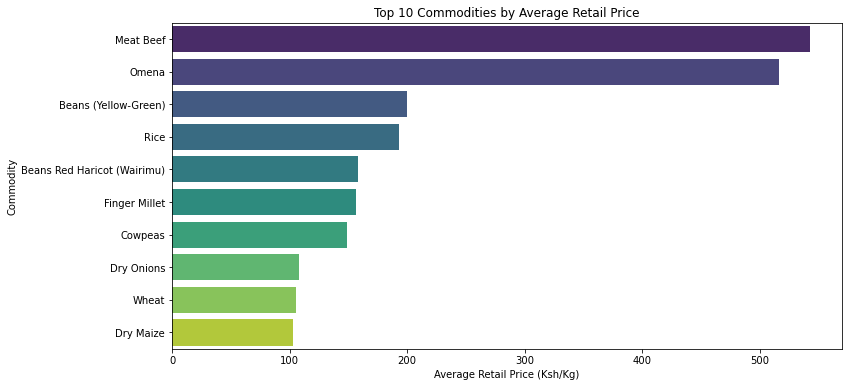

In [20]:

# Compute average Retail price per commodity
top_commodities = df_complete.groupby('Commodity')['Retail'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_commodities.values, y=top_commodities.index, palette="viridis")
plt.title("Top 10 Commodities by Average Retail Price")
plt.xlabel("Average Retail Price (Ksh/Kg)")
plt.ylabel("Commodity")
plt.show()
